In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import holoviews as hv
from holoviews import opts
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [2]:
# Read the csv file 
amzn_df = pd.read_csv(Path("./Resources/amzn.csv"))

# Convert 'time' column from timestamp (seconds since epoch) to acutal time
amzn_df ['time'] = pd.to_datetime(
    amzn_df['time'],
    unit = 's',
    infer_datetime_format=True,
    utc=True
)    
# Convert timezone from UTC to Eastern Time
amzn_df['time'] = amzn_df['time'].dt.tz_convert('US/Eastern')

# Set 'time' column as the index 
amzn_df.set_index('time', inplace=True)
                      
# Review df
amzn_df.head()        

,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Upper Band #2,Lower Band #2,Upper Band #3,...,Volume,Volume MA,EMA,Smoothing Line,Developing Poc,Developing VA High,Developing VA Low,Developing Poc.1,Developing VA High.1,Developing VA Low.1
time,,,,,,,,,,,,,,,,,,,,,
2012-03-14 09:30:00-04:00,9.1825,9.215995,9.057000,9.112999,9.128665,9.128665,9.128665,9.128665,9.128665,9.128665,...,73994680,107206355.0,9.597910,9.606610,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-15 09:30:00-04:00,9.1010,9.221500,9.015000,9.221500,9.152667,9.152667,9.152667,9.152667,9.152667,9.152667,...,83212340,103564913.0,9.594164,9.602464,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 09:30:00-04:00,9.1640,9.284000,9.117501,9.252500,9.218000,9.218000,9.218000,9.218000,9.218000,9.218000,...,98696480,95934268.0,9.590765,9.598431,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-19 09:30:00-04:00,9.1725,9.334000,9.150000,9.276000,9.253333,9.253333,9.253333,9.253333,9.253333,9.253333,...,78080380,92419724.0,9.587633,9.594651,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-20 09:30:00-04:00,9.2440,9.720500,9.144000,9.616500,9.493667,9.493667,9.493667,9.493667,9.493667,9.493667,...,183346180,94828072.0,9.587920,9.591678,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Droping NAN Values 
amzn_df = amzn_df.dropna(axis=1)
#Review the data frame
amzn_df.head()

,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Upper Band #2,Lower Band #2,Upper Band #3,Lower Band #3,Plot,Plot.1,Plot.2,Volume,Volume MA,EMA,Smoothing Line
time,,,,,,,,,,,,,,,,,,
2012-03-14 09:30:00-04:00,9.1825,9.215995,9.057000,9.112999,9.128665,9.128665,9.128665,9.128665,9.128665,9.128665,9.128665,9.215995,9.057000,9.1825,73994680,107206355.0,9.597910,9.606610
2012-03-15 09:30:00-04:00,9.1010,9.221500,9.015000,9.221500,9.152667,9.152667,9.152667,9.152667,9.152667,9.152667,9.152667,9.221500,9.015000,9.1010,83212340,103564913.0,9.594164,9.602464
2012-03-16 09:30:00-04:00,9.1640,9.284000,9.117501,9.252500,9.218000,9.218000,9.218000,9.218000,9.218000,9.218000,9.218000,9.284000,9.117501,9.1640,98696480,95934268.0,9.590765,9.598431
2012-03-19 09:30:00-04:00,9.1725,9.334000,9.150000,9.276000,9.253333,9.253333,9.253333,9.253333,9.253333,9.253333,9.253333,9.334000,9.150000,9.1725,78080380,92419724.0,9.587633,9.594651
2012-03-20 09:30:00-04:00,9.2440,9.720500,9.144000,9.616500,9.493667,9.493667,9.493667,9.493667,9.493667,9.493667,9.493667,9.720500,9.144000,9.2440,183346180,94828072.0,9.587920,9.591678


In [4]:
# Filter column and only keep ones needed
amzn_df = amzn_df.drop(columns=["Upper Band #1", "Lower Band #1", "Upper Band #2", "Lower Band #2", "Upper Band #3", "Lower Band #3","Plot", "Plot.1", "Plot.2","Smoothing Line"], axis=1)

# Review the DataFrame
amzn_df.head()


,open,high,low,close,VWAP,Volume,Volume MA,EMA
time,,,,,,,,
2012-03-14 09:30:00-04:00,9.1825,9.215995,9.057000,9.112999,9.128665,73994680,107206355.0,9.597910
2012-03-15 09:30:00-04:00,9.1010,9.221500,9.015000,9.221500,9.152667,83212340,103564913.0,9.594164
2012-03-16 09:30:00-04:00,9.1640,9.284000,9.117501,9.252500,9.218000,98696480,95934268.0,9.590765
2012-03-19 09:30:00-04:00,9.1725,9.334000,9.150000,9.276000,9.253333,78080380,92419724.0,9.587633
2012-03-20 09:30:00-04:00,9.2440,9.720500,9.144000,9.616500,9.493667,183346180,94828072.0,9.587920


In [5]:
#Reveiw the data frame 
amzn_close = amzn_df["close"]
amzn_close.head()

time
2012-03-14 09:30:00-04:00    9.112999
2012-03-15 09:30:00-04:00    9.221500
2012-03-16 09:30:00-04:00    9.252500
2012-03-19 09:30:00-04:00    9.276000
2012-03-20 09:30:00-04:00    9.616500
Name: close, dtype: float64

In [6]:
#plothing the dataframe
amzn_close.hvplot.line(x= "time", y= "close", 
                   title = 'Amzn Closing Price',
                  xlabel = 'Daily',
                  ylabel = 'Closing Price',
                  ylim = (0, 300),
                  color= 'green'
                  ).opts(yformatter = '%.0f')

:Curve   [time]   (close)

In [7]:
# Read the csv file 
meta_df = pd.read_csv(Path("./Resources/meta.csv"))

# Convert 'time' column from timestamp (seconds since epoch) to acutal time
meta_df ['time'] = pd.to_datetime(
    meta_df['time'],
    unit = 's',
    infer_datetime_format=True,
    utc=True
)    
# Convert timezone from UTC to Eastern Time
meta_df['time'] = meta_df['time'].dt.tz_convert('US/Eastern')

# Set 'time' column as the index 
meta_df.set_index('time', inplace=True)
                      
# Review df
meta_df.head()   

,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Upper Band #2,Lower Band #2,Upper Band #3,...,Volume,Volume MA,EMA,Smoothing Line,Developing Poc,Developing VA High,Developing VA Low,Developing Poc.1,Developing VA High.1,Developing VA Low.1
time,,,,,,,,,,,,,,,,,,,,,
2012-05-18 09:30:00-04:00,42.05,45.00000,38.00,38.2318,40.410600,40.410600,40.410600,40.410600,40.410600,40.410600,...,580587776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21 09:30:00-04:00,36.53,36.66000,33.00,34.0300,34.563333,34.563333,34.563333,34.563333,34.563333,34.563333,...,168309808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22 09:30:00-04:00,32.61,33.59000,30.94,31.0000,31.843333,31.843333,31.843333,31.843333,31.843333,31.843333,...,102053808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-23 09:30:00-04:00,31.37,32.50000,31.36,32.0000,31.953333,31.953333,31.953333,31.953333,31.953333,31.953333,...,73721120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-24 09:30:00-04:00,32.95,33.21001,31.77,33.0300,32.670003,32.670003,32.670003,32.670003,32.670003,32.670003,...,50275872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Droping NAN Values 
meta_df = meta_df.dropna(axis=1)
#Review the data frame
meta_df.head()


,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Upper Band #2,Lower Band #2,Upper Band #3,Lower Band #3,Plot,Plot.1,Plot.2,Volume
time,,,,,,,,,,,,,,,
2012-05-18 09:30:00-04:00,42.05,45.00000,38.00,38.2318,40.410600,40.410600,40.410600,40.410600,40.410600,40.410600,40.410600,45.00000,38.00,42.05,580587776
2012-05-21 09:30:00-04:00,36.53,36.66000,33.00,34.0300,34.563333,34.563333,34.563333,34.563333,34.563333,34.563333,34.563333,36.66000,33.00,36.53,168309808
2012-05-22 09:30:00-04:00,32.61,33.59000,30.94,31.0000,31.843333,31.843333,31.843333,31.843333,31.843333,31.843333,31.843333,33.59000,30.94,32.61,102053808
2012-05-23 09:30:00-04:00,31.37,32.50000,31.36,32.0000,31.953333,31.953333,31.953333,31.953333,31.953333,31.953333,31.953333,32.50000,31.36,31.37,73721120
2012-05-24 09:30:00-04:00,32.95,33.21001,31.77,33.0300,32.670003,32.670003,32.670003,32.670003,32.670003,32.670003,32.670003,33.21001,31.77,32.95,50275872


In [9]:
# Filter column and only keep ones needed
meta_df = meta_df.drop(columns=["Upper Band #1", "Lower Band #1", "Upper Band #2", "Lower Band #2", "Upper Band #3", "Lower Band #3","Plot", "Plot.1", "Plot.2"], axis=1)

# Review the DataFrame
meta_df.head()

,open,high,low,close,VWAP,Volume
time,,,,,,
2012-05-18 09:30:00-04:00,42.05,45.00000,38.00,38.2318,40.410600,580587776
2012-05-21 09:30:00-04:00,36.53,36.66000,33.00,34.0300,34.563333,168309808
2012-05-22 09:30:00-04:00,32.61,33.59000,30.94,31.0000,31.843333,102053808
2012-05-23 09:30:00-04:00,31.37,32.50000,31.36,32.0000,31.953333,73721120
2012-05-24 09:30:00-04:00,32.95,33.21001,31.77,33.0300,32.670003,50275872


In [10]:
#Reveiw the data frame 
meta_close = meta_df["close"]

meta_close.head()

time
2012-05-18 09:30:00-04:00    38.2318
2012-05-21 09:30:00-04:00    34.0300
2012-05-22 09:30:00-04:00    31.0000
2012-05-23 09:30:00-04:00    32.0000
2012-05-24 09:30:00-04:00    33.0300
Name: close, dtype: float64

In [11]:
#Ploting the dataframe
meta_close.hvplot.line(x= "time", y= "close", 
                   title = 'Meta Closing Price',
                  xlabel = 'Daily',
                  ylabel = 'Closing Price',
                  ylim = (0, 500),
                  color ='orange'
                  ).opts(yformatter = '%.0f') 

:Curve   [time]   (close)

In [12]:
# Read the csv file 
tsla_df = pd.read_csv(Path("./Resources/tsla.csv"))

# Convert 'time' column from timestamp (seconds since epoch) to acutal time
tsla_df ['time'] = pd.to_datetime(
    tsla_df['time'],
    unit = 's',
    infer_datetime_format=True,
    utc=True
)    
# Convert timezone from UTC to Eastern Time
tsla_df['time'] = tsla_df['time'].dt.tz_convert('US/Eastern')

# Set 'time' column as the index 
tsla_df.set_index('time', inplace=True)
                      
# Review df
tsla_df.head()   

,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Upper Band #2,Lower Band #2,Upper Band #3,...,Volume,Volume MA,EMA,Smoothing Line,Developing Poc,Developing VA High,Developing VA Low,Developing Poc.1,Developing VA High.1,Developing VA Low.1
time,,,,,,,,,,,,,,,,,,,,,
2012-03-12 09:30:00-04:00,2.312664,2.419330,2.306665,2.400664,2.375553,2.375553,2.375553,2.375553,2.375553,2.375553,...,29467829,16848705.00,1.929784,1.921918,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13 09:30:00-04:00,2.433997,2.439331,2.366664,2.405998,2.403998,2.403998,2.403998,2.403998,2.403998,2.403998,...,15024660,16731543.65,1.934522,1.925750,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-14 09:30:00-04:00,2.399998,2.399998,2.319998,2.352664,2.357553,2.357553,2.357553,2.357553,2.357553,2.357553,...,12771972,16011617.15,1.938683,1.929832,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-15 09:30:00-04:00,2.351998,2.365331,2.318664,2.333331,2.339109,2.339109,2.339109,2.339109,2.339109,2.339109,...,8573948,14366955.50,1.942610,1.934130,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 09:30:00-04:00,2.326664,2.392664,2.321998,2.354665,2.356442,2.356442,2.356442,2.356442,2.356442,2.356442,...,10938550,13249154.35,1.946710,1.938462,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Droping NAN Values 
tsla_df = tsla_df.dropna(axis=1)
#Review the data frame
tsla_df.head()

,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Upper Band #2,Lower Band #2,Upper Band #3,Lower Band #3,Plot,Plot.1,Plot.2,Volume,Volume MA,EMA,Smoothing Line
time,,,,,,,,,,,,,,,,,,
2012-03-12 09:30:00-04:00,2.312664,2.419330,2.306665,2.400664,2.375553,2.375553,2.375553,2.375553,2.375553,2.375553,2.375553,2.419330,2.306665,2.312664,29467829,16848705.00,1.929784,1.921918
2012-03-13 09:30:00-04:00,2.433997,2.439331,2.366664,2.405998,2.403998,2.403998,2.403998,2.403998,2.403998,2.403998,2.403998,2.439331,2.366664,2.433997,15024660,16731543.65,1.934522,1.925750
2012-03-14 09:30:00-04:00,2.399998,2.399998,2.319998,2.352664,2.357553,2.357553,2.357553,2.357553,2.357553,2.357553,2.357553,2.399998,2.319998,2.399998,12771972,16011617.15,1.938683,1.929832
2012-03-15 09:30:00-04:00,2.351998,2.365331,2.318664,2.333331,2.339109,2.339109,2.339109,2.339109,2.339109,2.339109,2.339109,2.365331,2.318664,2.351998,8573948,14366955.50,1.942610,1.934130
2012-03-16 09:30:00-04:00,2.326664,2.392664,2.321998,2.354665,2.356442,2.356442,2.356442,2.356442,2.356442,2.356442,2.356442,2.392664,2.321998,2.326664,10938550,13249154.35,1.946710,1.938462


In [14]:
# Filter column and only keep ones needed
tsla_df = tsla_df.drop(columns=["Upper Band #1", "Lower Band #1", "Upper Band #2", "Lower Band #2", "Upper Band #3", "Lower Band #3","Plot", "Plot.1", "Plot.2","Smoothing Line"], axis=1)

# Review the DataFrame
tsla_df.head()

,open,high,low,close,VWAP,Volume,Volume MA,EMA
time,,,,,,,,
2012-03-12 09:30:00-04:00,2.312664,2.419330,2.306665,2.400664,2.375553,29467829,16848705.00,1.929784
2012-03-13 09:30:00-04:00,2.433997,2.439331,2.366664,2.405998,2.403998,15024660,16731543.65,1.934522
2012-03-14 09:30:00-04:00,2.399998,2.399998,2.319998,2.352664,2.357553,12771972,16011617.15,1.938683
2012-03-15 09:30:00-04:00,2.351998,2.365331,2.318664,2.333331,2.339109,8573948,14366955.50,1.942610
2012-03-16 09:30:00-04:00,2.326664,2.392664,2.321998,2.354665,2.356442,10938550,13249154.35,1.946710


In [15]:
#Reveiw the data frame 
tsla_close = tsla_df ["close"]

tsla_close.head()

time
2012-03-12 09:30:00-04:00    2.400664
2012-03-13 09:30:00-04:00    2.405998
2012-03-14 09:30:00-04:00    2.352664
2012-03-15 09:30:00-04:00    2.333331
2012-03-16 09:30:00-04:00    2.354665
Name: close, dtype: float64

In [16]:
#create a visual for the stocks closing price 
tsla_close.hvplot.line(x= "time", y= "close", 
                   title = 'Tesla Closing Price',
                  xlabel = 'Daily',
                  ylabel = 'Closing Price',
                  ylim = (0, 500)
                  ).opts(yformatter = '%.0f')
                
    

:Curve   [time]   (close)

In [17]:
closing_prices = pd.concat([amzn_close, meta_close, tsla_close], axis= 1, join = "inner")

<Axes: xlabel='time'>

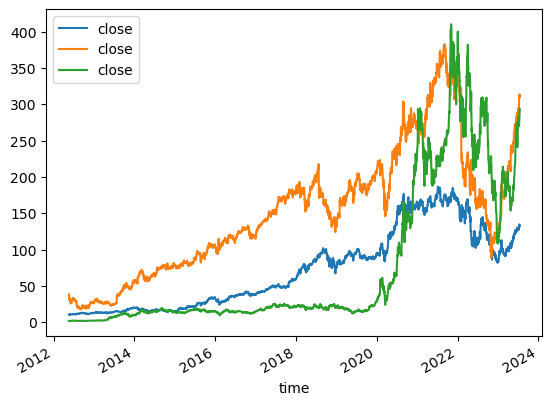

In [20]:
closing_prices.plot()